In [29]:
import pandas as pd
import numpy as np

import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

In [30]:
#Import demographics dataset
file_path = "C:/Users/adrianahe/capstoneproject-2022/demographics_new.csv"
demo_df = pd.read_csv(file_path)
demo_df.head()

,id. Response ID,Year[Month Year...ate submitted]],Carmain,Previous Plug in HEVs,Previous BatteryEVs,Previous HybridEVs,Household Income,"Importance of reducing greenhouse gas emissions (-3 not important, 3 important)",Home ownership (own 1),Highest Level of Education,...,Gender (Male 1),Number of vehicles in the household,Annual Vehicle MilesTraveled Estimate,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,FCV_1_3,2017.0,2016 Toyota Mirai,1.0,0.0,0.0,275000.0,2.52,1.0,3.0,...,0.0,2,14622.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FCV_1_4,2017.0,2016 Toyota Mirai,0.0,0.0,1.0,275000.0,2.76,1.0,4.0,...,0.0,3,9197.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FCV_1_2,2017.0,2016 Toyota Mirai,1.0,1.0,0.0,NaN,NaN,1.0,4.0,...,1.0,4,15360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FCV_1_15,2017.0,2017 Toyota Mirai,1.0,0.0,0.0,125000.0,2.60,1.0,2.0,...,0.0,3,5082.352941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FCV_1_8,2017.0,2016 Toyota Mirai,0.0,0.0,1.0,175000.0,1.23,1.0,4.0,...,0.0,2,13025.454550,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
demo_df.shape


(26970, 23)

In [32]:
#Use only 50% of data
demo_df.sample(frac=0.5)

,id. Response ID,Year[Month Year...ate submitted]],Carmain,Previous Plug in HEVs,Previous BatteryEVs,Previous HybridEVs,Household Income,"Importance of reducing greenhouse gas emissions (-3 not important, 3 important)",Home ownership (own 1),Highest Level of Education,...,Gender (Male 1),Number of vehicles in the household,Annual Vehicle MilesTraveled Estimate,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
13364,PHASE_2_17604,2016.0,2016 Chevrolet Volt,0.0,0.0,0.0,275000.0,2.83,1.0,3.0,...,0.0,3,14666.66667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7816,PHASE_2_195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25079,PHASE_4_5563,2018.0,2018 Honda Clarity Plug-in Hybrid,NaN,NaN,NaN,75000.0,2.88,1.0,4.0,...,1.0,1,8484.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22807,PHASE_4_3215,NaN,2018 Tesla Model 3 Long Range,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15362,PHASE_2.5_1731,2017.0,2016 Nissan Leaf,0.0,0.0,0.0,NaN,2.66,NaN,NaN,...,1.0,1,9600.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8997,PHASE_2_3903,2016.0,2016 Chevrolet Volt,0.0,0.0,0.0,75000.0,2.12,1.0,3.0,...,0.0,3,11333.33333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18001,PHASE_2.5_4450,2017.0,2016 Tesla Model X,1.0,0.0,0.0,325000.0,2.70,1.0,3.0,...,0.0,2,8160.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21729,PHASE_4_2101,2018.0,2018 Nissan Leaf,NaN,NaN,NaN,275000.0,2.34,1.0,3.0,...,0.0,2,15600.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25764,PHASE_4_6275,2018.0,2017 Honda Clarity EV,NaN,NaN,NaN,175000.0,-2.86,1.0,2.0,...,0.0,3,14142.85714,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Drop null values
demo_df_= demo_df.dropna()

In [34]:
demo_df.head()

,id. Response ID,Year[Month Year...ate submitted]],Carmain,Previous Plug in HEVs,Previous BatteryEVs,Previous HybridEVs,Household Income,"Importance of reducing greenhouse gas emissions (-3 not important, 3 important)",Home ownership (own 1),Highest Level of Education,...,Gender (Male 1),Number of vehicles in the household,Annual Vehicle MilesTraveled Estimate,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,FCV_1_3,2017.0,2016 Toyota Mirai,1.0,0.0,0.0,275000.0,2.52,1.0,3.0,...,0.0,2,14622.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FCV_1_4,2017.0,2016 Toyota Mirai,0.0,0.0,1.0,275000.0,2.76,1.0,4.0,...,0.0,3,9197.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FCV_1_2,2017.0,2016 Toyota Mirai,1.0,1.0,0.0,NaN,NaN,1.0,4.0,...,1.0,4,15360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FCV_1_15,2017.0,2017 Toyota Mirai,1.0,0.0,0.0,125000.0,2.60,1.0,2.0,...,0.0,3,5082.352941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FCV_1_8,2017.0,2016 Toyota Mirai,0.0,0.0,1.0,175000.0,1.23,1.0,4.0,...,0.0,2,13025.454550,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
demo_df.drop(columns=["id. Response ID"])
demo_df.head()

,id. Response ID,Year[Month Year...ate submitted]],Carmain,Previous Plug in HEVs,Previous BatteryEVs,Previous HybridEVs,Household Income,"Importance of reducing greenhouse gas emissions (-3 not important, 3 important)",Home ownership (own 1),Highest Level of Education,...,Gender (Male 1),Number of vehicles in the household,Annual Vehicle MilesTraveled Estimate,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,FCV_1_3,2017.0,2016 Toyota Mirai,1.0,0.0,0.0,275000.0,2.52,1.0,3.0,...,0.0,2,14622.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FCV_1_4,2017.0,2016 Toyota Mirai,0.0,0.0,1.0,275000.0,2.76,1.0,4.0,...,0.0,3,9197.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FCV_1_2,2017.0,2016 Toyota Mirai,1.0,1.0,0.0,NaN,NaN,1.0,4.0,...,1.0,4,15360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FCV_1_15,2017.0,2017 Toyota Mirai,1.0,0.0,0.0,125000.0,2.60,1.0,2.0,...,0.0,3,5082.352941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FCV_1_8,2017.0,2016 Toyota Mirai,0.0,0.0,1.0,175000.0,1.23,1.0,4.0,...,0.0,2,13025.454550,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Columns
demo_df.columns


Index(['id. Response ID', 'Year[Month Year...ate submitted]]', 'Carmain',
       'Previous Plug in HEVs', 'Previous BatteryEVs', 'Previous HybridEVs',
       'Household Income',
       'Importance of reducing greenhouse gas emissions (-3 not important, 3 important)',
       'Home ownership (own 1)', 'Highest Level of Education',
       'One-way commute distance', 'Number of people in the household', 'Age',
       'Gender (Male 1)', 'Number of vehicles in the household',
       'Annual Vehicle MilesTraveled Estimate ', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22'],
      dtype='object')

In [37]:
demo_df.drop(columns=['id. Response ID'], inplace=True)
demo_df.head()

,Year[Month Year...ate submitted]],Carmain,Previous Plug in HEVs,Previous BatteryEVs,Previous HybridEVs,Household Income,"Importance of reducing greenhouse gas emissions (-3 not important, 3 important)",Home ownership (own 1),Highest Level of Education,One-way commute distance,...,Gender (Male 1),Number of vehicles in the household,Annual Vehicle MilesTraveled Estimate,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,2017.0,2016 Toyota Mirai,1.0,0.0,0.0,275000.0,2.52,1.0,3.0,0.01,...,0.0,2,14622.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017.0,2016 Toyota Mirai,0.0,0.0,1.0,275000.0,2.76,1.0,4.0,10.69,...,0.0,3,9197.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017.0,2016 Toyota Mirai,1.0,1.0,0.0,NaN,NaN,1.0,4.0,9.39,...,1.0,4,15360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017.0,2017 Toyota Mirai,1.0,0.0,0.0,125000.0,2.60,1.0,2.0,17.63,...,0.0,3,5082.352941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017.0,2016 Toyota Mirai,0.0,0.0,1.0,175000.0,1.23,1.0,4.0,3.53,...,0.0,2,13025.454550,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
demo_df.columns

Index(['Year[Month Year...ate submitted]]', 'Carmain', 'Previous Plug in HEVs',
       'Previous BatteryEVs', 'Previous HybridEVs', 'Household Income',
       'Importance of reducing greenhouse gas emissions (-3 not important, 3 important)',
       'Home ownership (own 1)', 'Highest Level of Education',
       'One-way commute distance', 'Number of people in the household', 'Age',
       'Gender (Male 1)', 'Number of vehicles in the household',
       'Annual Vehicle MilesTraveled Estimate ', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22'],
      dtype='object')

In [39]:
demo_df.head()

,Year[Month Year...ate submitted]],Carmain,Previous Plug in HEVs,Previous BatteryEVs,Previous HybridEVs,Household Income,"Importance of reducing greenhouse gas emissions (-3 not important, 3 important)",Home ownership (own 1),Highest Level of Education,One-way commute distance,...,Gender (Male 1),Number of vehicles in the household,Annual Vehicle MilesTraveled Estimate,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,2017.0,2016 Toyota Mirai,1.0,0.0,0.0,275000.0,2.52,1.0,3.0,0.01,...,0.0,2,14622.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017.0,2016 Toyota Mirai,0.0,0.0,1.0,275000.0,2.76,1.0,4.0,10.69,...,0.0,3,9197.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017.0,2016 Toyota Mirai,1.0,1.0,0.0,NaN,NaN,1.0,4.0,9.39,...,1.0,4,15360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017.0,2017 Toyota Mirai,1.0,0.0,0.0,125000.0,2.60,1.0,2.0,17.63,...,0.0,3,5082.352941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017.0,2016 Toyota Mirai,0.0,0.0,1.0,175000.0,1.23,1.0,4.0,3.53,...,0.0,2,13025.454550,NaN,NaN,NaN,NaN,NaN,NaN,NaN


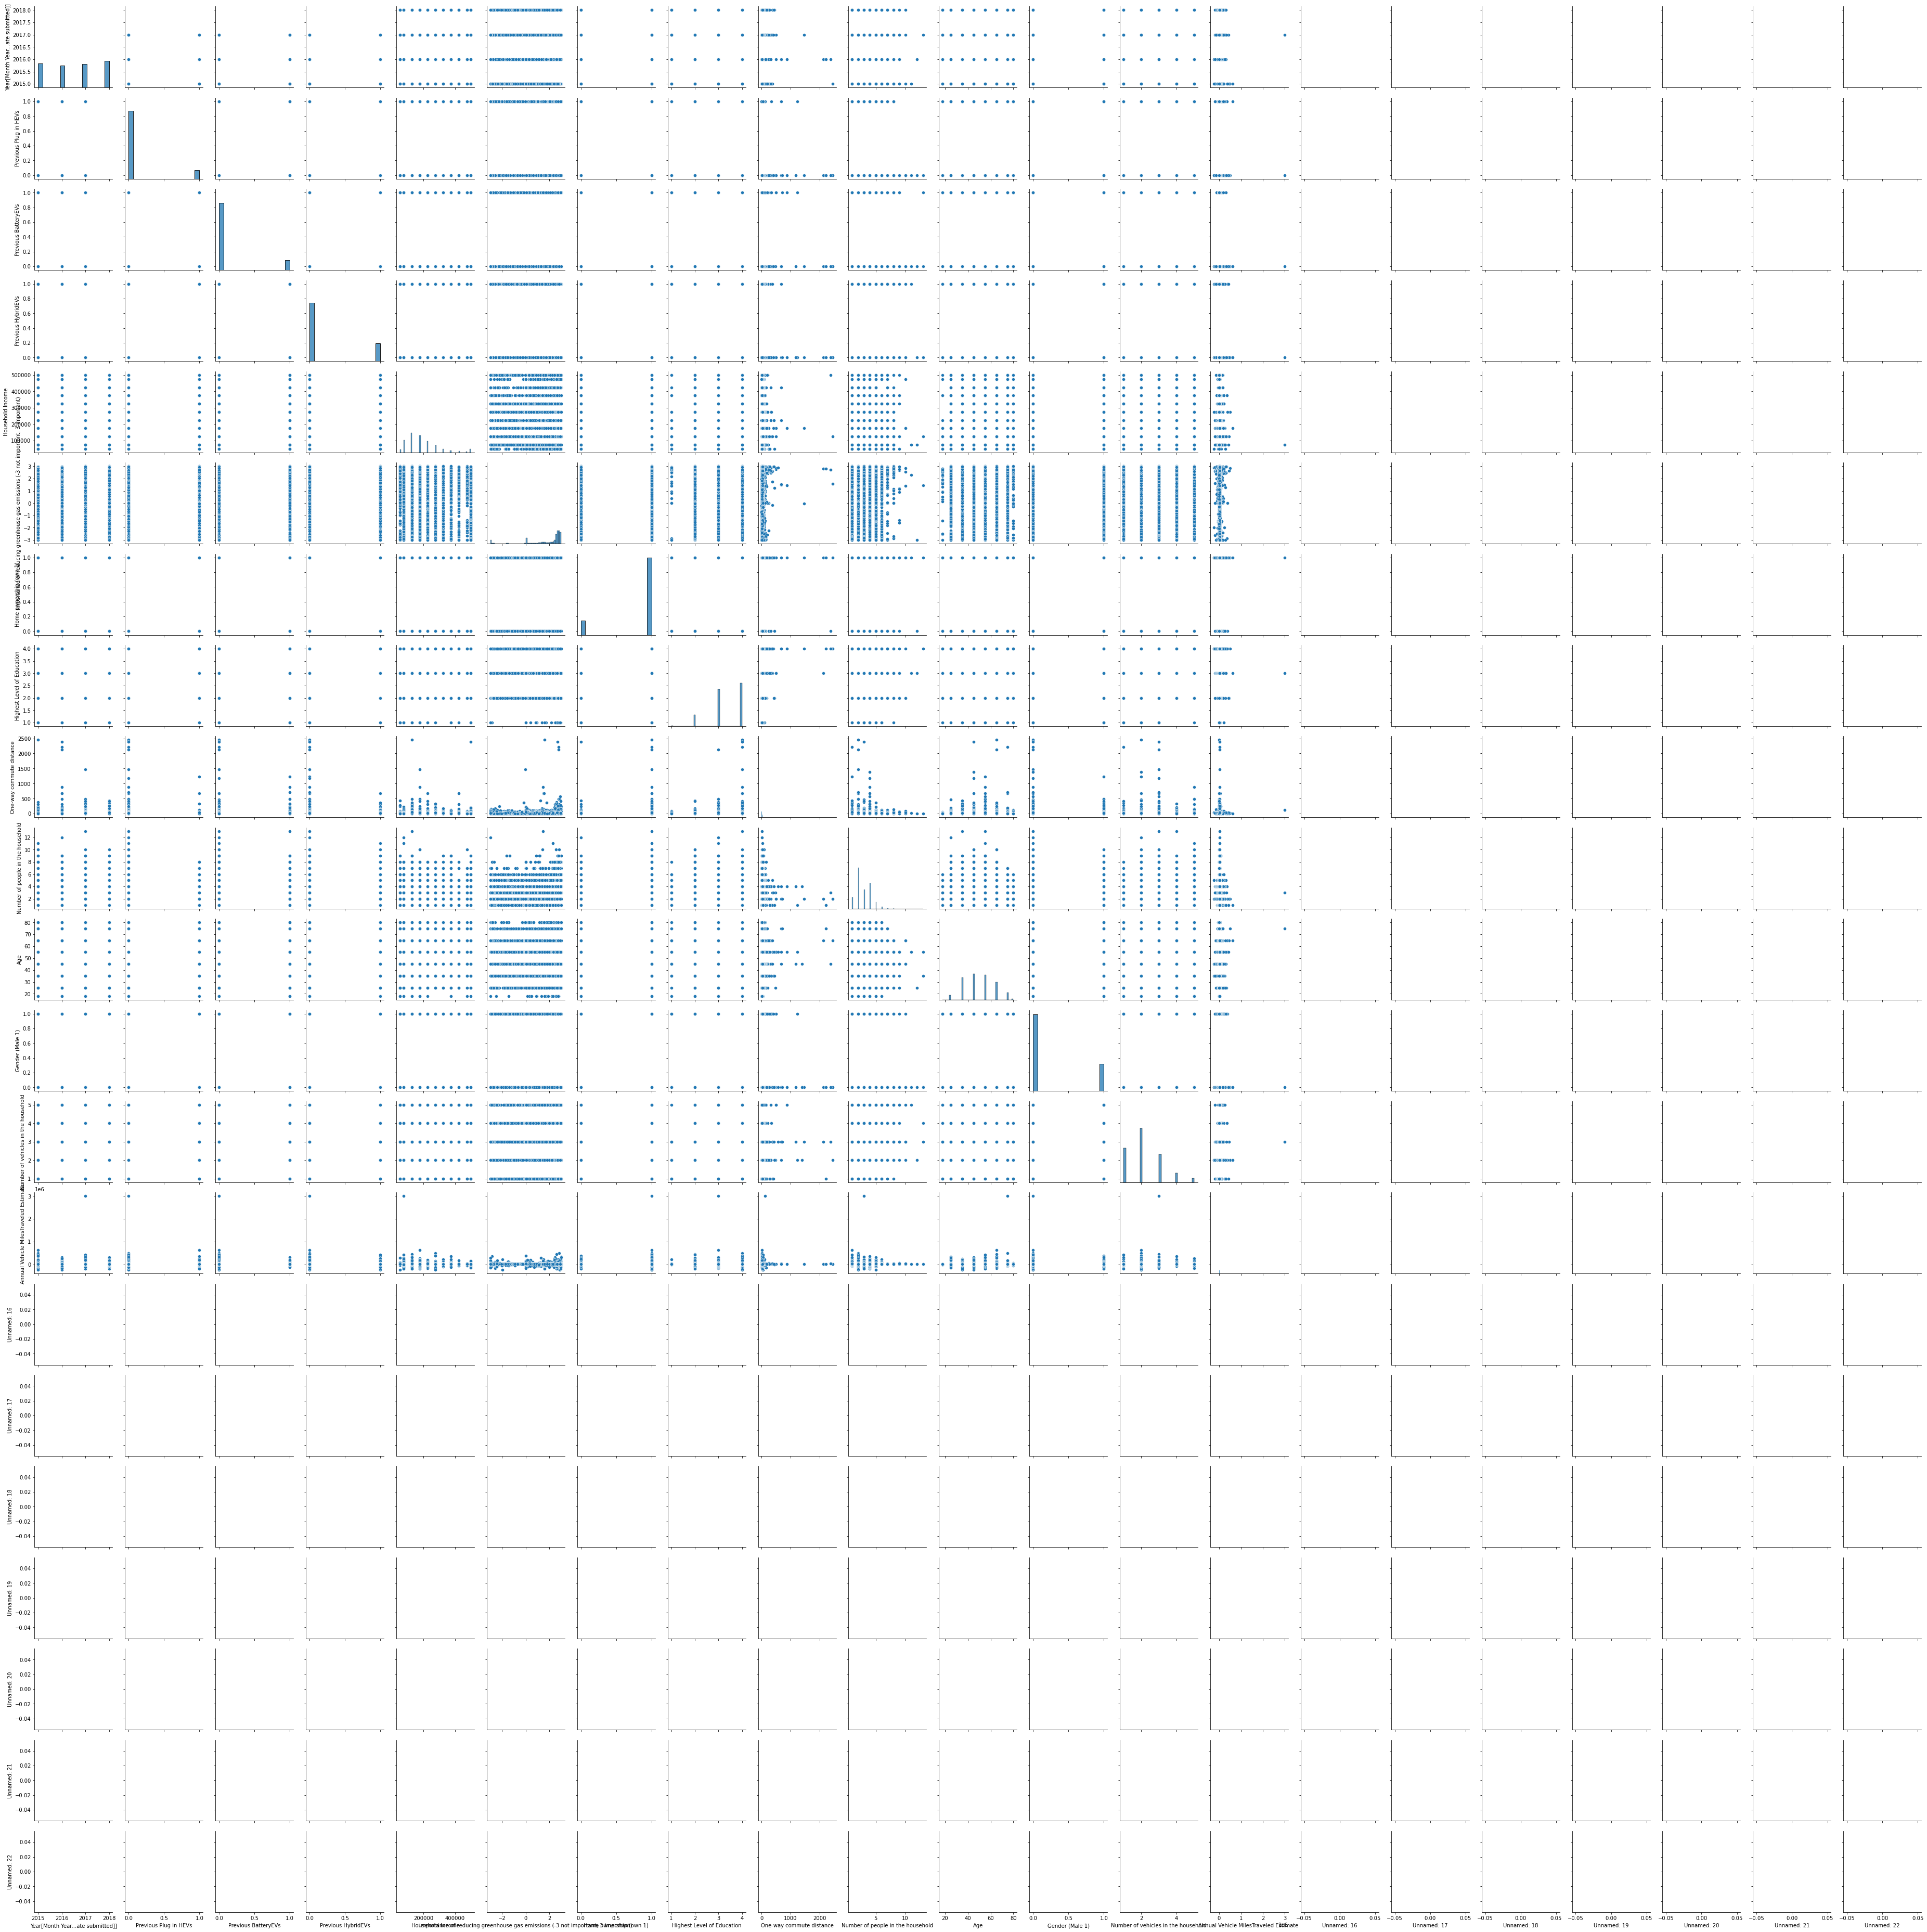

In [42]:
sb.pairplot(demo_df)